In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
df = pd.read_csv('BR_mod.csv')

In [3]:
df.dtypes

patient.age_at_initial_pathologic_diagnosis                                int64
patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision     float64
patient.axillary_lymph_node_stage_method_type                            float64
patient.breast_carcinoma_estrogen_receptor_status                        float64
patient.breast_carcinoma_progesterone_receptor_status                    float64
patient.breast_carcinoma_surgical_procedure_name                         float64
patient.gender                                                             int64
patient.histological_type                                                float64
patient.history_of_neoadjuvant_treatment                                 float64
patient.initial_pathologic_diagnosis_method                              float64
patient.lab_proc_her2_neu_immunohistochemistry_receptor_status           float64
patient.lymph_node_examined_count                                        float64
patient.margin_status       

In [4]:
#checking if NaNs exist
columns = list(df)
print('Columns v/s  Has_Nans')
for column in columns:
  col = df[column]
  print(column+'----> '+ str(col.hasnans))

Columns v/s  Has_Nans
patient.age_at_initial_pathologic_diagnosis----> False
patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision----> False
patient.axillary_lymph_node_stage_method_type----> True
patient.breast_carcinoma_estrogen_receptor_status----> True
patient.breast_carcinoma_progesterone_receptor_status----> True
patient.breast_carcinoma_surgical_procedure_name----> True
patient.gender----> False
patient.histological_type----> True
patient.history_of_neoadjuvant_treatment----> True
patient.initial_pathologic_diagnosis_method----> True
patient.lab_proc_her2_neu_immunohistochemistry_receptor_status----> True
patient.lymph_node_examined_count----> True
patient.margin_status----> True
patient.menopause_status----> True
patient.number_of_lymphnodes_positive_by_he----> True
patient.other_dx----> True
patient.person_neoplasm_cancer_status----> True
patient.race_list.race----> True
patient.stage_event.pathologic_stage----> True
patient.stage_event.tnm_categories.pathologi

In [5]:
#Replace NaNs with mean
for column in columns:
  col = df[column]
  mean_val = col.mean()
  col.fillna(value=mean_val,inplace=True)
  df[column] = col

In [6]:
#Rechecking if NaNs exist
print('Columns v/s  Has_Nans')
for column in columns:
  col = df[column]
  print(column+'----> '+ str(col.hasnans))

Columns v/s  Has_Nans
patient.age_at_initial_pathologic_diagnosis----> False
patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision----> False
patient.axillary_lymph_node_stage_method_type----> False
patient.breast_carcinoma_estrogen_receptor_status----> False
patient.breast_carcinoma_progesterone_receptor_status----> False
patient.breast_carcinoma_surgical_procedure_name----> False
patient.gender----> False
patient.histological_type----> False
patient.history_of_neoadjuvant_treatment----> False
patient.initial_pathologic_diagnosis_method----> False
patient.lab_proc_her2_neu_immunohistochemistry_receptor_status----> False
patient.lymph_node_examined_count----> False
patient.margin_status----> False
patient.menopause_status----> False
patient.number_of_lymphnodes_positive_by_he----> False
patient.other_dx----> False
patient.person_neoplasm_cancer_status----> False
patient.race_list.race----> False
patient.stage_event.pathologic_stage----> False
patient.stage_event.tnm_cate

In [7]:
#checking range of each attribute
for column in columns:
  col = df[column]
  print(column+'  '+str(col.max())+' '+str(col.min()))

patient.age_at_initial_pathologic_diagnosis  90 26
patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision  1.8 0.0
patient.axillary_lymph_node_stage_method_type  4.0 0.0
patient.breast_carcinoma_estrogen_receptor_status  1.0 0.0
patient.breast_carcinoma_progesterone_receptor_status  1.0 0.0
patient.breast_carcinoma_surgical_procedure_name  3.0 0.0
patient.gender  1 0
patient.histological_type  7.0 0.0
patient.history_of_neoadjuvant_treatment  1.0 0.0
patient.initial_pathologic_diagnosis_method  6.0 0.0
patient.lab_proc_her2_neu_immunohistochemistry_receptor_status  1.0 0.0
patient.lymph_node_examined_count  44.0 0.0
patient.margin_status  2.0 0.0
patient.menopause_status  3.0 0.0
patient.number_of_lymphnodes_positive_by_he  35.0 0.0
patient.other_dx  1.0 0.0
patient.person_neoplasm_cancer_status  1.0 0.0
patient.race_list.race  3.0 0.0
patient.stage_event.pathologic_stage  12.0 1.0
patient.stage_event.tnm_categories.pathologic_categories.pathologic_m  3 0
patient.stage_ev

In [8]:
df

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,patient.lab_proc_her2_neu_immunohistochemistry_receptor_status,patient.lymph_node_examined_count,patient.margin_status,patient.menopause_status,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,55,0.4,3.000000,1.0,1.0,1.0,1,2.0,0.0,1.750751,0.0,13.0,0.0,3.000000,4.0,0.0,1.0,2.0,12.0,2,15,13,0.0,0
1,50,1.8,3.000000,1.0,1.0,0.0,1,1.0,0.0,0.000000,1.0,15.0,0.0,2.000000,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
2,62,1.0,2.104427,1.0,1.0,1.0,1,1.0,0.0,0.000000,0.0,23.0,0.0,2.000000,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
3,52,1.0,4.000000,1.0,1.0,3.0,1,1.0,0.0,0.000000,1.0,2.0,2.0,2.121152,0.0,0.0,0.0,1.0,2.0,0,2,4,0.0,0
4,50,0.0,0.000000,1.0,1.0,1.0,1,2.0,0.0,0.000000,1.0,14.0,0.0,2.000000,4.0,0.0,0.0,2.0,8.0,0,10,5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,77,0.0,1.000000,1.0,1.0,0.0,1,2.0,0.0,0.000000,0.0,4.0,0.0,2.000000,0.0,0.0,0.0,2.0,2.0,2,1,4,0.0,37
1093,46,1.4,3.000000,1.0,1.0,1.0,1,2.0,0.0,0.000000,0.0,22.0,0.0,2.000000,5.0,0.0,0.0,2.0,8.0,2,10,4,0.0,38
1094,68,0.8,2.104427,1.0,1.0,3.0,1,2.0,0.0,0.000000,0.0,11.0,0.0,2.000000,0.0,0.0,0.0,2.0,6.0,2,0,8,0.0,38
1095,61,0.8,3.000000,1.0,1.0,2.0,1,2.0,0.0,0.000000,0.0,5.0,1.0,2.000000,3.0,1.0,0.0,2.0,8.0,2,5,8,0.0,39


In [9]:
#normalize the dataset
normalized_df=(df-df.min())/(df.max()-df.min())

In [10]:
normalized_df

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,patient.lab_proc_her2_neu_immunohistochemistry_receptor_status,patient.lymph_node_examined_count,patient.margin_status,patient.menopause_status,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,0.453125,0.222222,0.750000,1.0,1.0,0.333333,1.0,0.285714,0.0,0.291792,0.0,0.295455,0.0,1.000000,0.114286,0.0,1.0,0.666667,1.000000,0.666667,1.000000,1.000000,0.0,0.000000
1,0.375000,1.000000,0.750000,1.0,1.0,0.000000,1.0,0.142857,0.0,0.000000,1.0,0.340909,0.0,0.666667,0.028571,0.0,0.0,0.333333,0.454545,0.000000,0.333333,0.333333,0.0,0.000000
2,0.562500,0.555556,0.526107,1.0,1.0,0.333333,1.0,0.142857,0.0,0.000000,0.0,0.522727,0.0,0.666667,0.028571,0.0,0.0,0.333333,0.454545,0.000000,0.333333,0.333333,0.0,0.000000
3,0.406250,0.555556,1.000000,1.0,1.0,1.000000,1.0,0.142857,0.0,0.000000,1.0,0.045455,1.0,0.707051,0.000000,0.0,0.0,0.333333,0.090909,0.000000,0.133333,0.250000,0.0,0.000000
4,0.375000,0.000000,0.000000,1.0,1.0,0.333333,1.0,0.285714,0.0,0.000000,1.0,0.318182,0.0,0.666667,0.114286,0.0,0.0,0.666667,0.636364,0.000000,0.666667,0.333333,1.0,0.025641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,0.796875,0.000000,0.250000,1.0,1.0,0.000000,1.0,0.285714,0.0,0.000000,0.0,0.090909,0.0,0.666667,0.000000,0.0,0.0,0.666667,0.090909,0.666667,0.066667,0.250000,0.0,0.948718
1093,0.312500,0.777778,0.750000,1.0,1.0,0.333333,1.0,0.285714,0.0,0.000000,0.0,0.500000,0.0,0.666667,0.142857,0.0,0.0,0.666667,0.636364,0.666667,0.666667,0.250000,0.0,0.974359
1094,0.656250,0.444444,0.526107,1.0,1.0,1.000000,1.0,0.285714,0.0,0.000000,0.0,0.250000,0.0,0.666667,0.000000,0.0,0.0,0.666667,0.454545,0.666667,0.000000,0.583333,0.0,0.974359
1095,0.546875,0.444444,0.750000,1.0,1.0,0.666667,1.0,0.285714,0.0,0.000000,0.0,0.113636,0.5,0.666667,0.085714,1.0,0.0,0.666667,0.636364,0.666667,0.333333,0.583333,0.0,1.000000


In [11]:
numRows = normalized_df.count()
numRows = numRows[0]

In [12]:
numColums = len(list(normalized_df.iloc[0]))

In [13]:
#Ramdomize the dataset
normalized_df= normalized_df.sample(frac=1)

In [14]:
normalized_df = normalized_df.to_numpy()
x=[]
y=[]
#choose first k points as clusters
k=1
while(k<=10):
  #centroidList is a list of all K centroids represented as np array
  centroidList = []
  i=0
  while(i<k):
      centroidList.append(normalized_df[i])
      i=i+1
  modified = True
  points_to_cluster =[]
  #euclidean_dist_to_centroid saves the distance between a point and the centroid 
  #points_to_cluster serially stores the cluster number to which a point belongs. eg [1,1,2] indicates p1 belongs to cluster1, p2 belongs to cluster2, etc
  euclidean_dist_to_centroid = []
  for i in range(0,numRows):
    #initialise euclidean distance to a very large value
    euclidean_dist_to_centroid.append(10000)
    points_to_cluster.append(0)

  while(modified):
    modified = False
    
    clusters = []
    for i in range(0,k):
      #clusters is a list containing lists of points belonging to a cluster. eg [[p1,p2],[p3]] here p1 and p2 belong to first cluster and p3 belongs to second cluster
      clusters.append([])
    
    count = 0
    while(count<numRows):
      clusterNumber = 0
      #take each point in dataset(point 1)

      for point2 in centroidList:
        #take each centroid(point 2)
        clusterNumber = clusterNumber+1
        point1 = normalized_df[count]
        #calculate euclidean distance between points1 and point2
        dist = np.linalg.norm(point1 - point2)
        #new distacne is less than existing euclidean distance, update the cluster number of the point
        if dist < euclidean_dist_to_centroid[count]:
          euclidean_dist_to_centroid[count] = dist
          points_to_cluster[count] = clusterNumber
          clusters[clusterNumber-1].append(point1)
      count=count+1

    #update centroids after all points have been processed
    #local_modified[i] indicates if centroid of cluster[i] has been changed or not after allotment
    local_modified = []
    counter = Counter(points_to_cluster)
    counter = (dict(counter))

    #counter is a dictionary of cluster number and total number of points in that cluster. eg {1:30, 2:80} cluster1 contains 30 points and 2 contains 80 points
    clusterNumber = 0
    for i in centroidList:
      clusterNumber= clusterNumber+1
      size = counter.get(clusterNumber)
      #initialise centroid variable as empty np array
      centroid = np.zeros(numColums, dtype = int)

      #get each point belonging to a cluster
      for point in clusters[clusterNumber-1]:
        #add coordinates of each point
        centroid = np.add(centroid,point)

      #divide by size of cluster, this gives the mean centroid
      centroid = centroid/size

      #calculate euclidean distance between new mean centroid and old centroid of the cluster. If difference is negligible, do not update the centroid
      dist = np.linalg.norm(i - centroid)

      if dist<3:
        local_modified.append(False) 

      else:
        centroidList[clusterNumber-1] = centroid
        local_modified.append(True) 

    #check if any centroid was updated, if yes then run the process again
    for i in local_modified:
      if i == True:
        modified = True
  print("Number of points in each cluster")      
  print('K = '+ str(k) + ': ')
  print(Counter(points_to_cluster))
  x.append(k)
  sum = 0

  #sum of squared error for each point wrt to the centroid, for elbow method for finding optimal value of K
  for i in range(0,numRows):
    sum = sum + np.linalg.norm(centroidList[points_to_cluster[i]-1] -  normalized_df[i])
  y.append(sum)
  k=k+1

Number of points in each cluster
K = 1: 
Counter({1: 1097})
Number of points in each cluster
K = 2: 
Counter({2: 852, 1: 245})
Number of points in each cluster
K = 3: 
Counter({2: 648, 3: 366, 1: 83})
Number of points in each cluster
K = 4: 
Counter({4: 647, 2: 255, 3: 168, 1: 27})
Number of points in each cluster
K = 5: 
Counter({4: 459, 5: 425, 3: 113, 2: 87, 1: 13})
Number of points in each cluster
K = 6: 
Counter({6: 578, 5: 255, 4: 122, 3: 84, 2: 52, 1: 6})
Number of points in each cluster
K = 7: 
Counter({6: 551, 5: 166, 7: 145, 4: 117, 3: 83, 2: 29, 1: 6})
Number of points in each cluster
K = 8: 
Counter({6: 435, 5: 157, 8: 150, 7: 135, 4: 105, 3: 83, 2: 26, 1: 6})
Number of points in each cluster
K = 9: 
Counter({6: 364, 5: 153, 7: 131, 8: 123, 9: 120, 4: 104, 3: 74, 2: 23, 1: 5})
Number of points in each cluster
K = 10: 
Counter({6: 304, 5: 150, 7: 119, 9: 117, 10: 116, 4: 101, 8: 91, 3: 74, 2: 20, 1: 5})


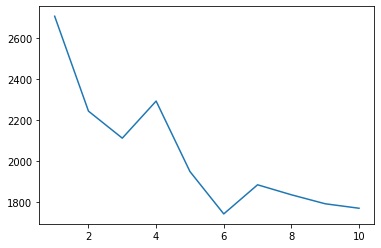

In [15]:
import matplotlib.pyplot as plt
plt.plot(x, y)

In [16]:
#Repeat the entire process for optimal value of K, at the time of coding this
k=7
centroidList = []
i=0
while(i<k):
    centroidList.append(normalized_df[i])
    i=i+1
modified = True
points_to_cluster =[]
euclidean_dist_to_centroid = []
for i in range(0,numRows):
  euclidean_dist_to_centroid.append(10000)
  points_to_cluster.append(0)

while(modified):
  modified = False
  
  
  clusters = []
  for i in range(0,k):
    clusters.append([])
  
  
  count = 0
  while(count<numRows):
    clusterNumber = 0
    for point2 in centroidList:
      clusterNumber = clusterNumber+1
      point1 = normalized_df[count]
      dist = np.linalg.norm(point1 - point2)
      if dist < euclidean_dist_to_centroid[count]:
        euclidean_dist_to_centroid[count] = dist
        points_to_cluster[count] = clusterNumber
        clusters[clusterNumber-1].append(point1)
    count=count+1
  #update centroids
  local_modified = []
  counter = Counter(points_to_cluster)
  counter = (dict(counter))
  clusterNumber = 0
  for i in centroidList:
    clusterNumber= clusterNumber+1
    size = counter.get(clusterNumber)
    centroid = np.zeros(numColums, dtype = int)
    for point in clusters[clusterNumber-1]:
      centroid = np.add(centroid,point)
    centroid = centroid/size
    dist = np.linalg.norm(i - centroid)
    #print(dist)
    if dist<3:
      local_modified.append(False) 
    else:
      centroidList[clusterNumber-1] = centroid
      local_modified.append(True) 
  for i in local_modified:
    if i == True:
      modified = True

#add cluster number to each row
df['Cluster'] = points_to_cluster
df

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,patient.lab_proc_her2_neu_immunohistochemistry_receptor_status,patient.lymph_node_examined_count,patient.margin_status,patient.menopause_status,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site,Cluster
0,55,0.4,3.000000,1.0,1.0,1.0,1,2.0,0.0,1.750751,0.0,13.0,0.0,3.000000,4.0,0.0,1.0,2.0,12.0,2,15,13,0.0,0,1
1,50,1.8,3.000000,1.0,1.0,0.0,1,1.0,0.0,0.000000,1.0,15.0,0.0,2.000000,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0,2
2,62,1.0,2.104427,1.0,1.0,1.0,1,1.0,0.0,0.000000,0.0,23.0,0.0,2.000000,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0,3
3,52,1.0,4.000000,1.0,1.0,3.0,1,1.0,0.0,0.000000,1.0,2.0,2.0,2.121152,0.0,0.0,0.0,1.0,2.0,0,2,4,0.0,0,4
4,50,0.0,0.000000,1.0,1.0,1.0,1,2.0,0.0,0.000000,1.0,14.0,0.0,2.000000,4.0,0.0,0.0,2.0,8.0,0,10,5,1.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,77,0.0,1.000000,1.0,1.0,0.0,1,2.0,0.0,0.000000,0.0,4.0,0.0,2.000000,0.0,0.0,0.0,2.0,2.0,2,1,4,0.0,37,7
1093,46,1.4,3.000000,1.0,1.0,1.0,1,2.0,0.0,0.000000,0.0,22.0,0.0,2.000000,5.0,0.0,0.0,2.0,8.0,2,10,4,0.0,38,6
1094,68,0.8,2.104427,1.0,1.0,3.0,1,2.0,0.0,0.000000,0.0,11.0,0.0,2.000000,0.0,0.0,0.0,2.0,6.0,2,0,8,0.0,38,6
1095,61,0.8,3.000000,1.0,1.0,2.0,1,2.0,0.0,0.000000,0.0,5.0,1.0,2.000000,3.0,1.0,0.0,2.0,8.0,2,5,8,0.0,39,7
